Que. 1

Perform K-Means, Hierarchical and DBSCAN Clustering for the airlines data to obtain optimum number of clusters. 
Also Visualise the results.

Data Description:
 
The file EastWest.csv data contains information on passengers who belong to an airline’s frequent flier program. For each passenger the data include information on their mileage history and on different ways they accrued or spent miles in the last year. The goal is to try to identify clusters of passengers that have similar characteristics for the purpose of targeting different segments for different types of mileage offers.

Balance--Number of miles eligible for award travel

Qual_mile--Number of miles counted as qualifying for Topflight status

cc1_miles -- Number of miles earned with freq. flyer credit card in the past 12 months:
cc2_miles -- Number of miles earned with Rewards credit card in the past 12 months:
cc3_miles -- Number of miles earned with Small Business credit card in the past 12 months:

Bonus_miles--Number of miles earned from non-flight bonus transactions in the past 12 months

Bonus_trans--Number of non-flight bonus transactions in the past 12 months

Flight_miles_12mo--Number of flight miles in the past 12 months

Flight_trans_12--Number of flight transactions in the past 12 months

Days_since_enrolled--Number of days since enrolled in flier program

Award--whether that person had award flight (free flight) or not.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings(action="ignore")

In [2]:
df = pd.read_csv('EastWest .csv')
df.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID#                3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award?             3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB


In [4]:
del df['ID#']

In [5]:
df.columns

Index(['Balance', 'Qual_miles', 'cc1_miles', 'cc2_miles', 'cc3_miles',
       'Bonus_miles', 'Bonus_trans', 'Flight_miles_12mo', 'Flight_trans_12',
       'Days_since_enroll', 'Award?'],
      dtype='object')

In [6]:
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
array_scaled = scalar.fit_transform(df)

In [7]:
df = pd.DataFrame(array_scaled, columns=['Balance', 'Qual_miles', 'cc1_miles', 'cc2_miles', 'cc3_miles',
       'Bonus_miles', 'Bonus_trans', 'Flight_miles_12mo', 'Flight_trans_12',
       'Days_since_enroll', 'Award?'])

<Axes: >

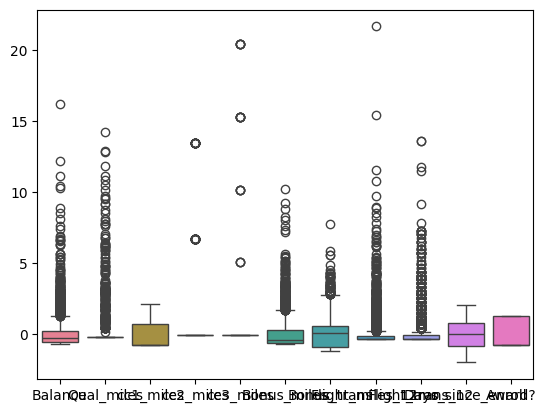

In [8]:
sns.boxplot(df)

In [9]:
n_clusters = 5

In [10]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=n_clusters, random_state=123456)
kmeans.fit(df)

KMeans(n_clusters=5, random_state=123456)

In [11]:
kmeans.labels_

array([3, 3, 3, ..., 0, 3, 3])

### result visualization

Text(0.5, 1.0, 'Clusters')

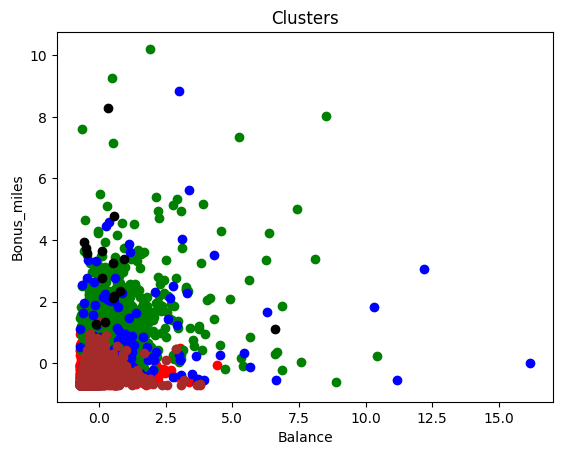

In [12]:
colors = ["red", "green", "blue", "brown", "black", "yellow"]
for cluster in range(n_clusters):
    plt.scatter(df['Balance'][kmeans.labels_ == cluster],
               df['Bonus_miles'][kmeans.labels_ == cluster],
               color=colors[cluster]
               )
plt.xlabel("Balance")
plt.ylabel("Bonus_miles")
plt.title("Clusters")

In [13]:
from sklearn.cluster import KMeans

# collect wss for all the clusters
wss = []

for cluster in range(1, 10):
    # create kmeans with number of clusters
    kmeans = KMeans(n_clusters=cluster, random_state=123456)

    kmeans.fit(df)
    
    wss.append(kmeans.inertia_)

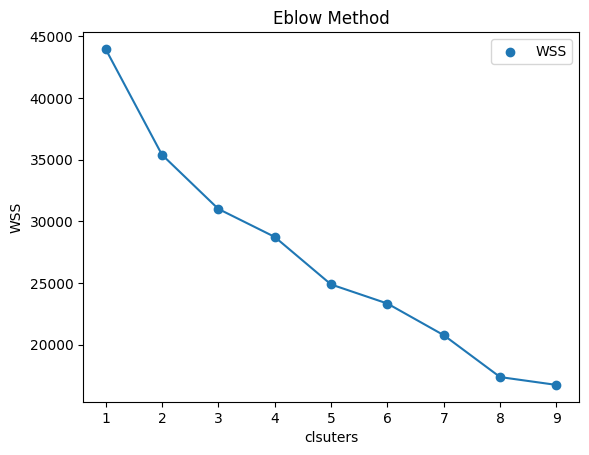

In [14]:
# create the number of clusters
clusters = np.arange(1, 10)

# create the eblow chart
plt.scatter(clusters, wss, label="WSS")
plt.plot(clusters, wss)

# hilight the eblow point
plt.xlabel("clsuters")
plt.ylabel("WSS")
plt.title("Eblow Method")
plt.legend()

## Hierarchical clustering

In [15]:
from sklearn.cluster import AgglomerativeClustering

agglomerative = AgglomerativeClustering(n_clusters=4)

agglomerative.fit(df)

AgglomerativeClustering(n_clusters=4)

In [16]:
agglomerative.labels_

array([1, 1, 1, ..., 0, 1, 1], dtype=int64)

### RESULT VISULAIZATION

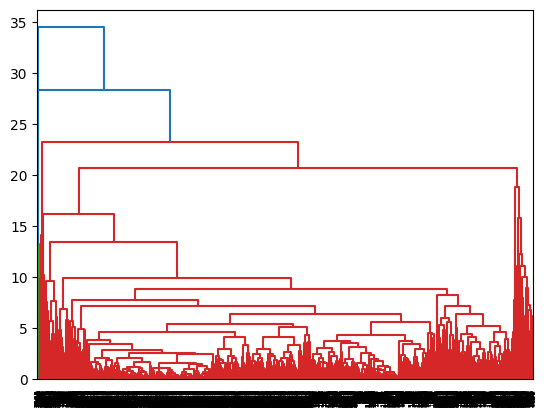

In [17]:
from scipy.cluster import hierarchy

# create linkage
linkage = hierarchy.linkage(df, method='complete')

# render a dendrogram
dendrogram = hierarchy.dendrogram(linkage)

# DBScan

In [17]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=2,min_samples= 12)

dbscan.fit(df)

DBSCAN(eps=2, min_samples=12)

In [18]:
pd.Series(dbscan.labels_).value_counts()

 0    2440
 1    1302
-1     241
 2      16
Name: count, dtype: int64